# CATS AND DOG PROJECT 

## Importing libraries

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

In [4]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator  
# ImageDataGeneraor is used for generating the images
# the colors of images ranges from 0-255 (works like feature scaling)
# but we will take it in the 0/1 format

In [5]:
# we will cheak the version of tensorrflow 
tf.__version__

'2.15.0'

## Part 1 : Data Preprocessing 

## Preprocessing The Training Data 

In [6]:
# we will apply diffrent transformations on the image 
# rescale : we will standerise ll value in standerise form 
# share_range : we will move image closckwise in particular angle 
# zomm_range : we will zoom the image 
# horizontal_flip : we will set our image horizontally 

train_datagen = ImageDataGenerator(rescale=1./255 ,
                                   shear_range=0.2 ,
                                   zoom_range=0.2 ,
                                   horizontal_flip=True )

# we will import the dataset from our file directory directly 
# we are not using pandas here for importing 

# target_size : All images will have the diffrent size we will set them in the particular size 
# batch_size : we will not take all images at once we will divide all dataset images in batches of 32 
# class_mode : In the training set folder we have further 2 subfolders ( 2 categories)

training_set = train_datagen.flow_from_directory(r"C:\Users\swapn\Machine learning projects\PREPINSTA\DATASET\CATS AND DOGS PROJECT\dogs_cats\training_set" ,
                                                 target_size=(64,64), 
                                                 batch_size=32 , 
                                                 class_mode='binary' )
                                                 
                                                 

 # it will tell us how many images present and preset folders 

Found 8000 images belonging to 2 classes.


## Preprocessing The Test Set 

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255 )

# WE CAN ALSO USE THIS HERE BUT WE WILL NOT USE IT 
# shear_range=0.2 , shear_range=0.2 , shear_range=0.2 , shear_range=0.2 ,

test_set = train_datagen.flow_from_directory(r"C:\Users\swapn\Machine learning projects\PREPINSTA\DATASET\CATS AND DOGS PROJECT\dogs_cats\test_set" ,
                                                 target_size=(64,64), 
                                                 batch_size=32 , 
                                                 class_mode='binary' )

# it will tell us total images and total folders present in the testing set folder 

Found 2000 images belonging to 2 classes.


## PART 2 : BUILDING THE CNN

## Initializing the CNN

In [8]:
cnn = tf.keras.models.Sequential()

# WE HAVE CREATED THE INITIALIZATION FOR THE NEURONS WE ARE GOING TO USE 

## Step 1 : Convolution 

In [9]:
# filters=32 : WE WILL APPLY NO.OF FILTERS ON THE INPUT IMAGE 
# EACH FILTER IS USED FOR DETECTING THE SPECIFIC FEATURE FROM THE IMAGE 

# kernel_size=3 : SPECIFY THE HEIGHT OF CONVOLUTIONAL WINDOW  , HERE 3 : THE CONVOLUTIONAL KERNAL WILL CREATE THE 3* 3 MATRIX FOR EACH IMAGE 

# activation = "relu" : RECTIFIED LINEAR UNIT # IT WILL RETURN THE IMPUT IMAGE IS O/1 
# FOR INCREASING THE NON LINEARITY OF THE IMAGE 

# input_shape = [64 , 64 , 3] : WE WILL SPECIFY THE SIZE ( HEIGHT , WIDTH , CHANNELS )
# CHANNELS : NO.OF COLUR CHANNNEL 


cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation = "relu" , input_shape = [64 , 64 , 3]))

## Step 2 : Pooling 

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2 ))

# pool_size = 2 : we will take here 2*2 window from the above created window 
# strides = 2  :  we will tell how our window will move it will move 2*2 in the metrix in vertically and horizontaly 

# we will find the maximum size from the pooling created metix 

## Adding A Second Convolutional layer 

In [11]:
# we have created the metrix in after pooling 
# we will identify the max_size from the polling matrix 

# we will use the 2 layers neural network for the better prediction 

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation = "relu" , input_shape = [64 , 64 , 3])) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2 ))


## Step 3 : Flattering 

In [12]:
# we have created the 2 neurons layers but this neurons layers cant accept the values of images 
# so using flattering for this this will convert this values into the linear data points 

cnn.add(tf.keras.layers.Flatten())


## Step 4 : Full Connections 

In [13]:
# finally we will make the full connection with the neurons 
# units = 120 : cicles present in the neuronsl network (in hidden layer)
# activation = "relu" we will use it 

# we will use the DENSE function for this making the connection 

cnn.add(tf.keras.layers.Dense(units = 120 , activation = "relu")) 

## Step 5 : Output Layer 

In [14]:
# we will create the output layer now 
# unit = 1 : the output layer will hav 1 cicle as we know 
# activation = " sigmoid" # activation function is also used in the output layer also 

# only in the output layer the activation function will be sigmoid 

cnn.add(tf.keras.layers.Dense(units = 1 , activation="sigmoid" ))

## Part 3 : Training the CNN

## Compiling the CNN

In [15]:
# optimizer = " adam : used for predicting the weights for the input layer values(features )
# loss = "binary_crossentropy" : WE NEED THE RESULT IN BINARY FORMAT # we will store this binary in all the neiurons 
# metrics = "accuracy" : for increasing the performance and the accuracy 
# we will compile the cnn 

# DATA IS BINARY SO WE USED BINARY CROSSENTROPY 
# IF THE DATA IS CATEGORICAL THEN WE MUST HAVE USED THE CATEGORICAL_CROSSENTROPY 

cnn.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"] )


## Training the CNN on the training set and evaluting the test set 

In [16]:
# NOW WE WILL TRAIN OUR MODEL USING THE TRAINING SET DATA AND THE TESTING SET DATA 

# epochs = 20 : means we will train our model 20 times 
# in ann we have done this 120 times 

# x = training set : means we will takwe the traing set data 
# our model will learn from this 

# validation = test_set   # now it will try to comapre that with the testing data cat folder 


cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


250/250 [==============================] - 75s 292ms/step - loss: 0.6801 - accuracy: 0.5685 - val_loss: 0.6265 - val_accuracy: 0.6565
Epoch 2/25
250/250 [==============================] - 44s 174ms/step - loss: 0.6216 - accuracy: 0.6539 - val_loss: 0.6030 - val_accuracy: 0.6795
Epoch 3/25
250/250 [==============================] - 44s 178ms/step - loss: 0.5706 - accuracy: 0.7024 - val_loss: 0.5457 - val_accuracy: 0.7265
Epoch 4/25
250/250 [==============================] - 44s 178ms/step - loss: 0.5346 - accuracy: 0.7299 - val_loss: 0.5273 - val_accuracy: 0.7450
Epoch 5/25
250/250 [==============================] - 43s 172ms/step - loss: 0.5095 - accuracy: 0.7496 - val_loss: 0.5009 - val_accuracy: 0.7630
Epoch 6/25
250/250 [==============================] - 44s 177ms/step - loss: 0.4898 - accuracy: 0.7607 - val_loss: 0.5307 - val_accuracy: 0.7425
Epoch 7/25
250/250 [==============================] - 44s 177ms/step - loss: 0.4736 - accuracy: 0.7735 - val_loss: 0.5177 - val_

# MAKING PREDICTION 

In [21]:
# importing libraries 
import numpy as np
from keras.preprocessing import image

# loading the image 
test_image = image.load_img(r"C:\Users\swapn\Machine learning projects\PREPINSTA\DATASET\CATS AND DOGS PROJECT\dogs_cats\single_prediction\cat_dog10.jpg", target_size=(64, 64))

# convert the image to array 
test_image = image.img_to_array(test_image)

# expand the dimension of image 
test_image = np.expand_dims(test_image, axis=0)

# result prediction 
result = cnn.predict(test_image)

# Get the class indices
class_indices = training_set.class_indices

# Check the result and assign prediction
if result[0][0] == 1:   # This image is stored in the 2 d array 
    prediction = "dog"    # on;y 1 element present in the 2 d array 
else:
    prediction = "cat"


1/1 [==============================] - 0s 65ms/step


In [22]:
print(prediction)

dog


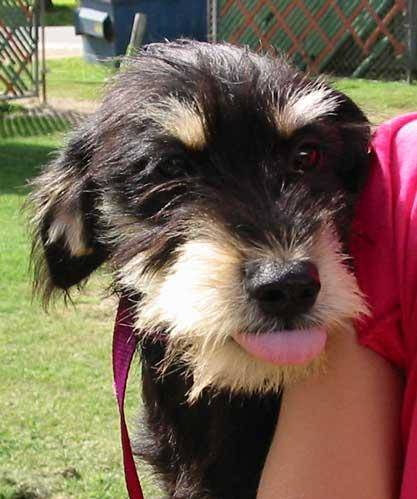

In [28]:
from IPython.display import Image, display

file_path = r"C:\Users\swapn\Machine learning projects\PREPINSTA\DATASET\CATS AND DOGS PROJECT\dogs_cats\single_prediction\cat_dog10.jpg"

display(Image(filename=file_path))


In [20]:
print(class_indices)

{'cats': 0, 'dogs': 1}
